# LOAN Application Predication 

Initial Analysis-

•	Total tuples 614 reference "applicant income & coapplicant income" count.
•	Examle of Attribute Types
1.	Nominal - LoanID
2.	Binary - Symetric Binary: Gender, Self Employed 
3.	Ordinal- Property_Area
4.	Target Column- Loan_Statis
5.	Categorical Columns = Credit_History , Dependents , Gender , Married , Education ,Property_Area , Self_Employed


In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Getting tha data 

In [2]:
train_df = pd.read_csv("G:/LoanApplicantData.csv")

In [3]:
#Data Exploration/Analysis
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Feature	Description
Loan_ID 	Unique Loan ID 
Gender 	Male/ Female 
Married 	Applicant married (Y/N) 
Dependents 	Number of dependents 
Education 	Applicant Education (Graduate/Under Graduate) 
Self_Employed 	Self-employed (Y/N) 
ApplicantIncome 	Applicant income 
CoapplicantIncome 	Applicant income 
LoanAmount 	Loan amount in thousands 
Loan_Amount_Term 	Term of loan in months 
Credit_History 	Credit history meets guidelines 
Property_Area	Urban/ Semi Urban/ Rural
Loan_Status	Loan approved (Y/N) - Target (Class) Variable


In [4]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train_df.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)
#print( train_df.isnull().sum())
#print( train_df.isnull().count())
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(15)

,Total,%
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5
Loan_Status,0,0.0
Property_Area,0,0.0
CoapplicantIncome,0,0.0


Loan Id don't make any sense to decide if loan should be granted or not

Y    422
N    192
Name: Loan_Status, dtype: int64


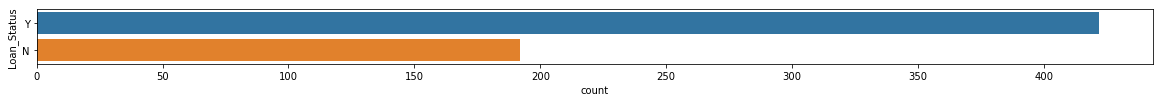

In [8]:
# How many people got loan?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Loan_Status', data=train_df);
print(train_df.Loan_Status.value_counts())

To perform our data analysis, let's create new dataframe

# Feature: Gender

Male      489
Female    112
Name: Gender, dtype: int64


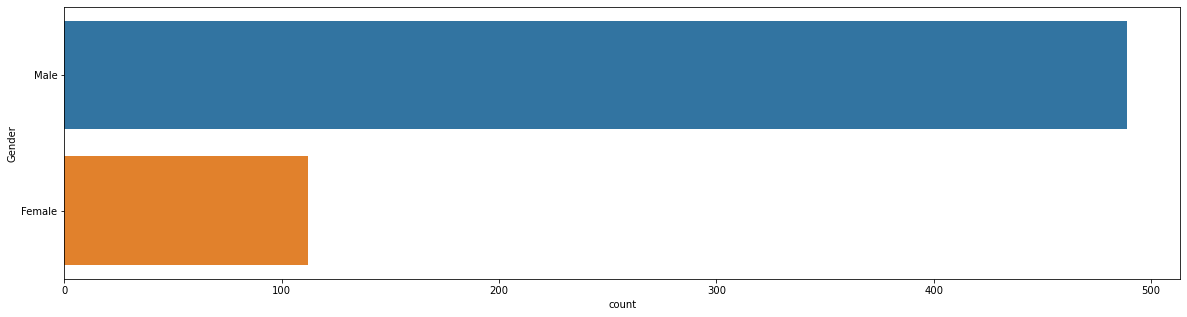

In [9]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Gender", data=train_df);
print(train_df.Gender.value_counts())



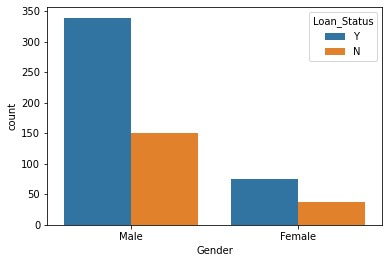

In [10]:
sns.countplot(x=train_df["Gender"],hue=train_df["Loan_Status"]);

In [11]:
# Are there any missing values in the gender column?
train_df.Gender.isnull().sum()

13

Fill missing values for gender with common values

In [12]:
common_value = 'Male'
data = [train_df]

for dataset in data:
    dataset['Gender'] = dataset['Gender'].fillna(common_value)

In [13]:
# Are there any missing values in the gender column?
train_df.Gender.isnull().sum()

0

Convert Gender feature in numeric feature

In [14]:
genders = {"Male": 0, "Female": 1}
data = [train_df]

for dataset in data:
    dataset['Gender'] = dataset['Gender'].map(genders)

In [15]:
train_df.Gender.isnull().sum()

0

In [16]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Feature:Married

Yes    398
No     213
Name: Married, dtype: int64


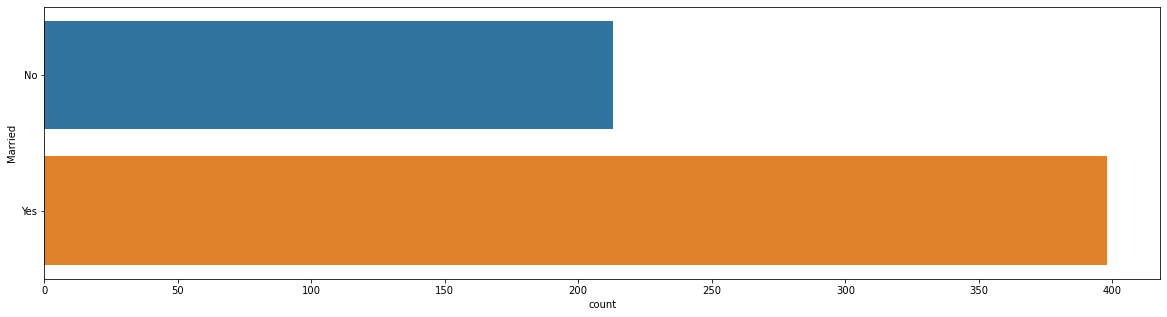

In [17]:
# Let's view the distribution of married
plt.figure(figsize=(20, 5))
sns.countplot(y="Married", data=train_df);
print(train_df.Married.value_counts())

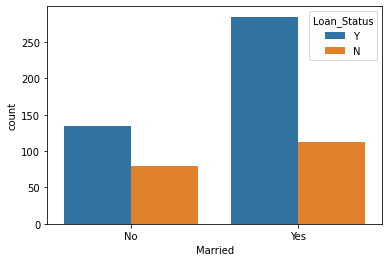

In [18]:
sns.countplot(x=train_df["Married"],hue=train_df["Loan_Status"]);

In [19]:
# Are there any missing values in the married column?
train_df.Married.isnull().sum()

3

Convert Married into generic column. 1 is Yes, 0 is No

In [20]:
common_value = 'No'
data = [train_df]

for dataset in data:
    dataset['Married'] = dataset['Married'].fillna(common_value)

In [21]:
married = {"No": 0, "Yes": 1}
data = [train_df]

for dataset in data:
    dataset['Married'] = dataset['Married'].map(married)

In [22]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
# Different data types in the dataset
train_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [24]:
train_df.Married.isnull().sum()

0

Feature Education

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


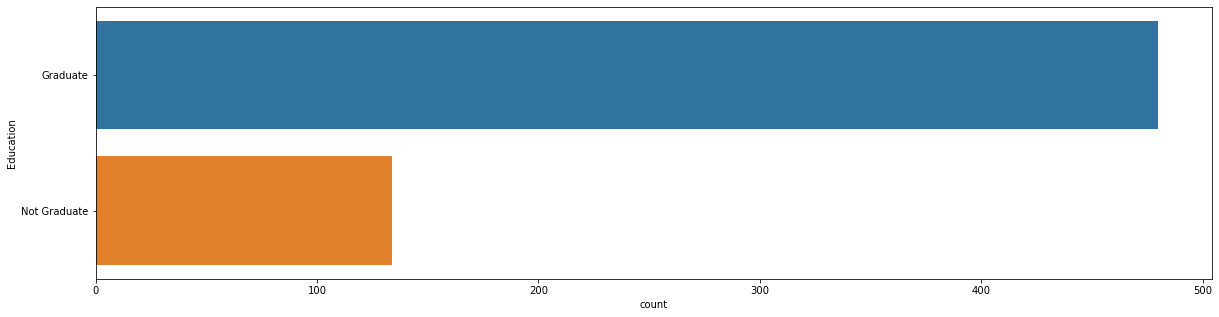

In [25]:
# Let's view the distribution of education
plt.figure(figsize=(20, 5))
sns.countplot(y="Education", data=train_df);
print(train_df.Education.value_counts())

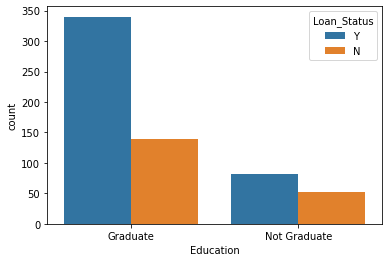

In [26]:
sns.countplot(x=train_df["Education"],hue=train_df["Loan_Status"]);

In [27]:
train_df.Education.isnull().sum()

0

In [28]:
education = {"Not Graduate": 0, "Graduate": 1}
data = [train_df]

for dataset in data:
    dataset['Education'] = dataset['Education'].map(education)

Feature Self_Employed

No     500
Yes     82
Name: Self_Employed, dtype: int64


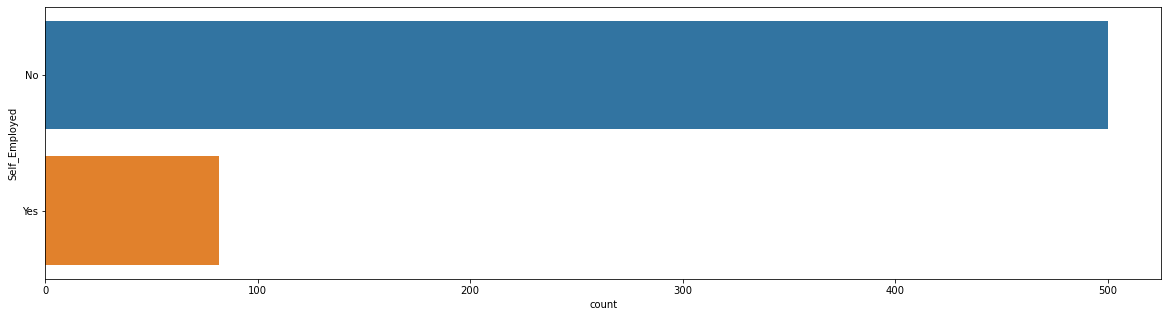

In [29]:
# Let's view the distribution of Self_Employed
plt.figure(figsize=(20, 5))
sns.countplot(y="Self_Employed", data=train_df);
print(train_df.Self_Employed.value_counts())

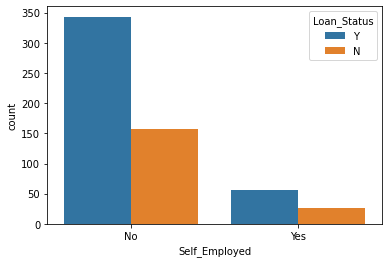

In [30]:
sns.countplot(x=train_df["Self_Employed"],hue=train_df["Loan_Status"]);

In [31]:
train_df.Self_Employed.isnull().sum()

32

Fill missing values with common values

In [32]:
common_value = 'Yes'
data = [train_df]

for dataset in data:
    dataset['Self_Employed'] = dataset['Self_Employed'].fillna(common_value)

In [33]:
train_df.Self_Employed.isnull().sum()

0

convert Self_Employed in 0 or 1

In [34]:
self_employed = {"No": 0, "Yes": 1}
data = [train_df]

for dataset in data:
    dataset['Self_Employed'] = dataset['Self_Employed'].map(self_employed)

In [35]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y


Feature Education

In [36]:
train_df.Education.isnull().sum()

0

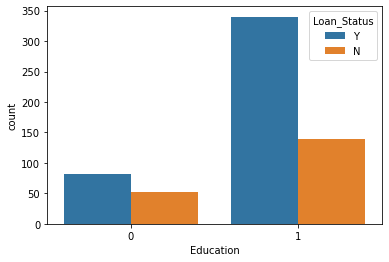

In [37]:
sns.countplot(x=train_df["Education"],hue=train_df["Loan_Status"]);

In [38]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y


Feature Dependents

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


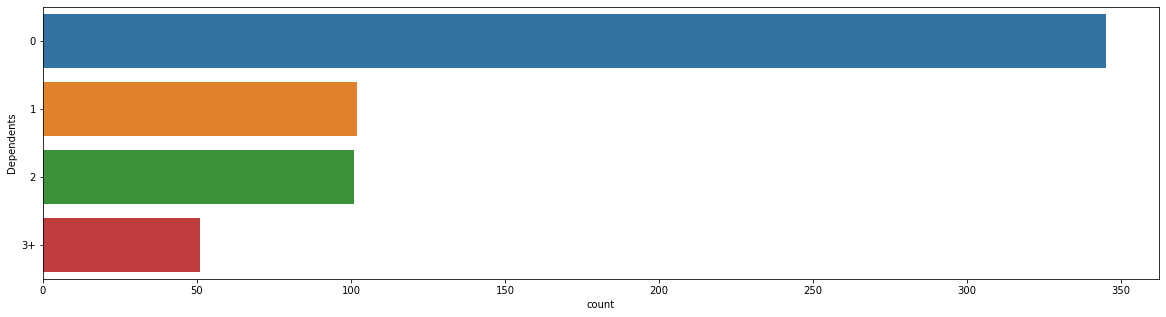

In [39]:
# Let's view the distribution of dependants
plt.figure(figsize=(20, 5))
sns.countplot(y="Dependents", data=train_df);
print(train_df.Dependents.value_counts())

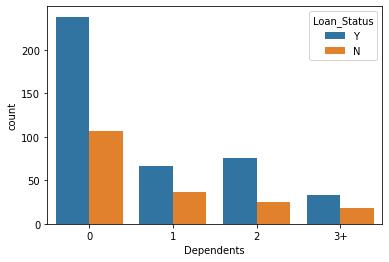

In [40]:
sns.countplot(x=train_df["Dependents"],hue=train_df["Loan_Status"]);

In [41]:
train_df.Dependents.isnull().sum()

15

Fill missing values with common values

In [42]:
common_value = '0'
data = [train_df]

for dataset in data:
    dataset['Dependents'] = dataset['Dependents'].fillna(common_value)

In [43]:
train_df.Dependents.isnull().sum()

0

Replace 3+ values with 3,0 with 0,1 with 1,2 with 2

In [44]:
dependant = {"0": 0, "1": 1, "2": 2,"3+": 3}
data = [train_df]

for dataset in data:
    dataset['Dependents'] = dataset['Dependents'].map(dependant)

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


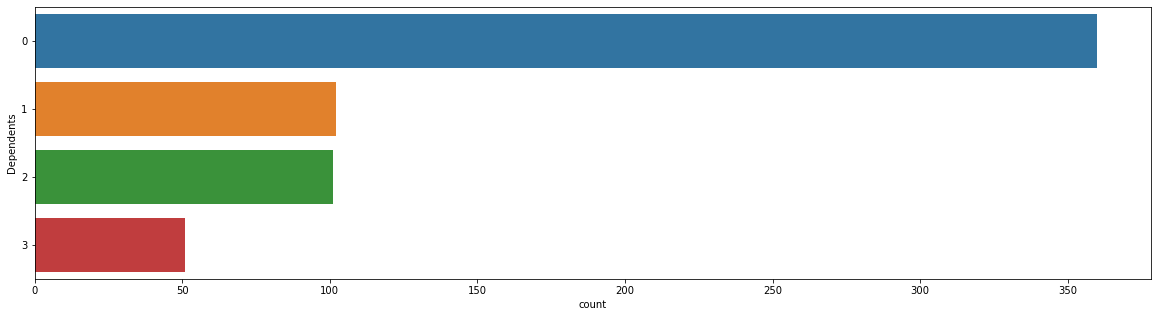

In [45]:
# Let's view the distribution of dependants
plt.figure(figsize=(20, 5))
sns.countplot(y="Dependents", data=train_df);
print(train_df.Dependents.value_counts())

In [46]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,0,1,3,1,0,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Feature Property Area

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


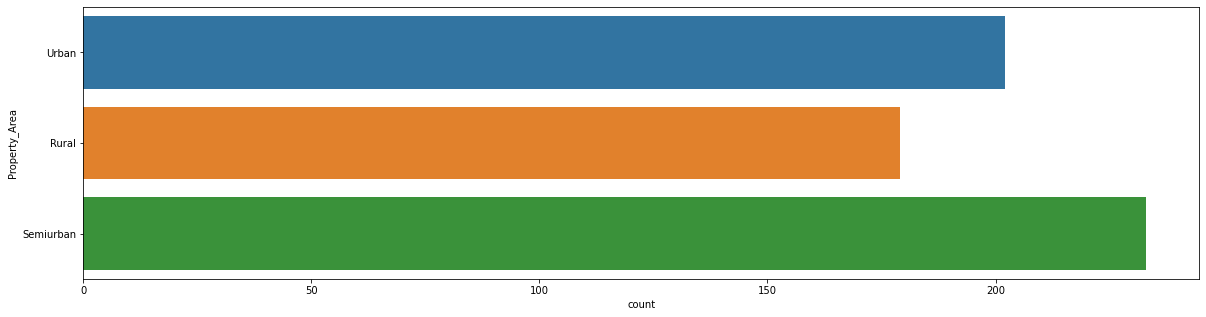

In [47]:
# Let's view the distribution of dependants
plt.figure(figsize=(20, 5))
sns.countplot(y="Property_Area", data=train_df);
print(train_df.Property_Area.value_counts())


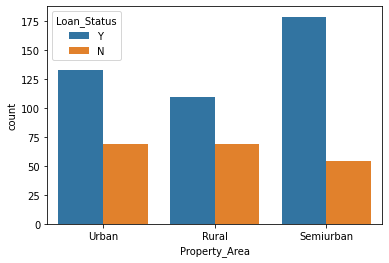

In [48]:
sns.countplot(x=train_df["Property_Area"],hue=train_df["Loan_Status"]);

In [49]:
train_df.Property_Area.isnull().sum()

0

Convert into numeric values.
Urban=0, Rural=1, Semiurban=2

In [50]:
area = {"Urban": 0, "Rural": 1, "Semiurban": 2}
data = [train_df]

for dataset in data:
    dataset['Property_Area'] = dataset['Property_Area'].map(area)

In [51]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,0,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,Y
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,Y
6,LP001013,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,0,Y
7,LP001014,0,1,3,1,0,3036,2504.0,158.0,360.0,0.0,2,N
8,LP001018,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,0,Y
9,LP001020,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,N


Feature Credit History

1.0    475
0.0     89
Name: Credit_History, dtype: int64


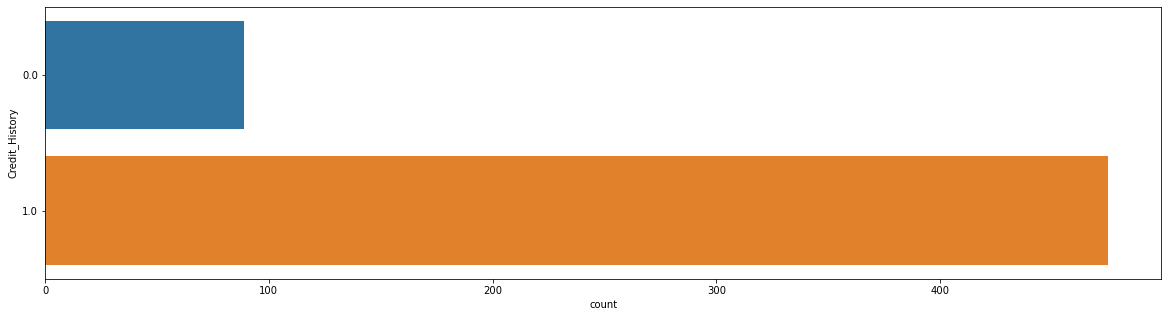

In [52]:
# Let's view the distribution of credit history
plt.figure(figsize=(20, 5))
sns.countplot(y="Credit_History", data=train_df);
print(train_df.Credit_History.value_counts())

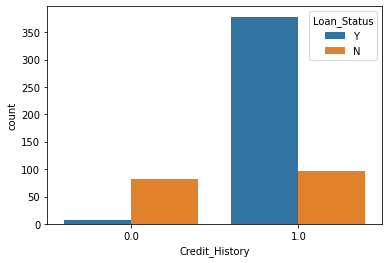

In [53]:
sns.countplot(x=train_df["Credit_History"],hue=train_df["Loan_Status"]);

In [54]:
train_df.Credit_History.isnull().sum()

50

Fill history with common values

In [55]:
common_value = 1
data = [train_df]

for dataset in data:
    dataset['Credit_History'] = dataset['Credit_History'].fillna(1)
    dataset['Credit_History'] = dataset['Credit_History'].astype(int)
  

In [56]:
train_df.Credit_History.isnull().sum()

0

In [57]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1,0,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1,0,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1,0,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1,0,Y
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1,0,Y
6,LP001013,0,1,0,0,0,2333,1516.0,95.0,360.0,1,0,Y
7,LP001014,0,1,3,1,0,3036,2504.0,158.0,360.0,0,2,N
8,LP001018,0,1,2,1,0,4006,1526.0,168.0,360.0,1,0,Y
9,LP001020,0,1,1,1,0,12841,10968.0,349.0,360.0,1,2,N


In [58]:
print(train_df.Credit_History.value_counts())

1    525
0     89
Name: Credit_History, dtype: int64


Feature Applicant Income

In [59]:
train_df.ApplicantIncome.value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [60]:
train_df.ApplicantIncome.isnull().sum()

0

In [61]:
train_df.CoapplicantIncome.isnull().sum()

0

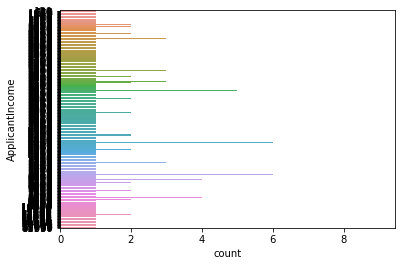

In [62]:
sns.countplot(y="ApplicantIncome", data=train_df);

extreme values in income(outliers)

In [63]:
#combining total income
data = [train_df]
for dataset in data:
    dataset['totalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

In [64]:
train_df.totalIncome.isnull().sum()

0

In [65]:
#combining total income
data = [train_df]
for dataset in data:
    dataset['TotalIncome_log'] = np.log(dataset['totalIncome'])

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


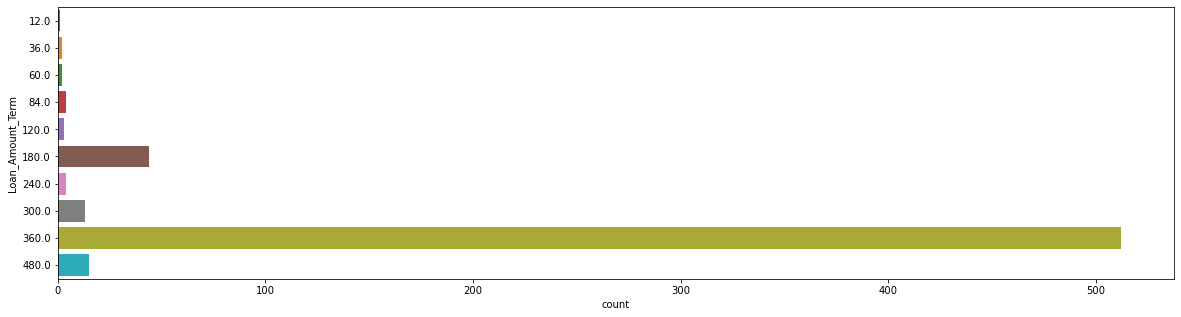

In [66]:
# Let's view the distribution of Loan_Amount_Term
plt.figure(figsize=(20, 5))
sns.countplot(y="Loan_Amount_Term", data=train_df);
print(train_df.Loan_Amount_Term.value_counts())

In [67]:
train_df.Loan_Amount_Term.isnull().sum()

14

In [68]:
common_value = 360
data = [train_df]

for dataset in data:
    dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(common_value)

In [69]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome,TotalIncome_log
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1,0,Y,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1,N,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1,0,Y,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1,0,Y,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1,0,Y,6000.0,8.699515
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1,0,Y,9613.0,9.170872
6,LP001013,0,1,0,0,0,2333,1516.0,95.0,360.0,1,0,Y,3849.0,8.255569
7,LP001014,0,1,3,1,0,3036,2504.0,158.0,360.0,0,2,N,5540.0,8.619750
8,LP001018,0,1,2,1,0,4006,1526.0,168.0,360.0,1,0,Y,5532.0,8.618305
9,LP001020,0,1,1,1,0,12841,10968.0,349.0,360.0,1,2,N,23809.0,10.077819


In [70]:
train_df.Loan_Amount_Term.isnull().sum()

0

In [71]:
term = {12: 0,60: 1, 84: 2, 120: 3,180: 4, 240: 5, 300: 6,360: 7, 480: 8}
data = [train_df]

for dataset in data:
    dataset['Loan_Amount_Term'] = np.log(dataset['Loan_Amount_Term'])

In [72]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome,TotalIncome_log
0,LP001002,0,0,0,1,0,5849,0.0,NaN,5.886104,1,0,Y,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,5.886104,1,1,N,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.0,5.886104,1,0,Y,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,5.886104,1,0,Y,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.0,5.886104,1,0,Y,6000.0,8.699515
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,5.886104,1,0,Y,9613.0,9.170872
6,LP001013,0,1,0,0,0,2333,1516.0,95.0,5.886104,1,0,Y,3849.0,8.255569
7,LP001014,0,1,3,1,0,3036,2504.0,158.0,5.886104,0,2,N,5540.0,8.619750
8,LP001018,0,1,2,1,0,4006,1526.0,168.0,5.886104,1,0,Y,5532.0,8.618305
9,LP001020,0,1,1,1,0,12841,10968.0,349.0,5.886104,1,2,N,23809.0,10.077819


120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64


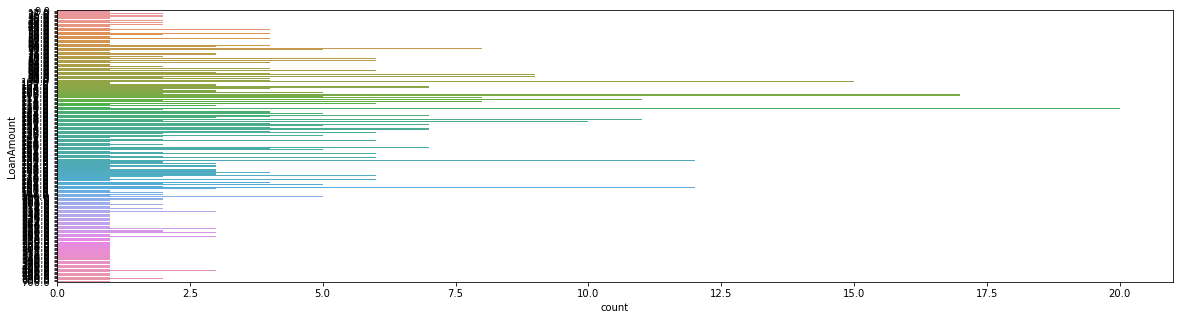

In [73]:
# Let's view the distribution of LoanAmount
plt.figure(figsize=(20, 5))
sns.countplot(y="LoanAmount", data=train_df);
print(train_df.LoanAmount.value_counts())

In [74]:
train_df.LoanAmount.isnull().sum()

22

In [75]:
loan_amount_mean = train_df["LoanAmount"].mean()

In [76]:
loan_amount_mean

146.41216216216216

In [77]:
data = [train_df]

for dataset in data:
    dataset['LoanAmount'] = dataset['LoanAmount'].fillna(loan_amount_mean)

In [78]:
data = [train_df]

for dataset in data:
    dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])

In [79]:
total = train_df.isnull().sum().sort_values(ascending=False)
#print( train_df.isnull().sum())
#print( train_df.isnull().count())
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(15)

,Total,%
LoanAmount_log,0,0.0
TotalIncome_log,0,0.0
totalIncome,0,0.0
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0


In [80]:
# Remove Embarked rows which are missing values
print(len(train_df))
train_df = train_df.dropna(subset=['Loan_Amount_Term'])
print(len(train_df))

614
614


In [81]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome,TotalIncome_log,LoanAmount_log
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,5.886104,1,0,Y,5849.0,8.674026,4.986426
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,5.886104,1,1,N,6091.0,8.714568,4.852030
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,5.886104,1,0,Y,3000.0,8.006368,4.189655
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,5.886104,1,0,Y,4941.0,8.505323,4.787492
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,5.886104,1,0,Y,6000.0,8.699515,4.948760
5,LP001011,0,1,2,1,1,5417,4196.0,267.000000,5.886104,1,0,Y,9613.0,9.170872,5.587249
6,LP001013,0,1,0,0,0,2333,1516.0,95.000000,5.886104,1,0,Y,3849.0,8.255569,4.553877
7,LP001014,0,1,3,1,0,3036,2504.0,158.000000,5.886104,0,2,N,5540.0,8.619750,5.062595
8,LP001018,0,1,2,1,0,4006,1526.0,168.000000,5.886104,1,0,Y,5532.0,8.618305,5.123964
9,LP001020,0,1,1,1,0,12841,10968.0,349.000000,5.886104,1,2,N,23809.0,10.077819,5.855072


In [82]:
df_set=train_df

In [83]:
df_set.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalIncome,TotalIncome_log,LoanAmount_log
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,5.886104,1,0,Y,5849.0,8.674026,4.986426
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,5.886104,1,1,N,6091.0,8.714568,4.852030
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,5.886104,1,0,Y,3000.0,8.006368,4.189655
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,5.886104,1,0,Y,4941.0,8.505323,4.787492
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,5.886104,1,0,Y,6000.0,8.699515,4.948760
5,LP001011,0,1,2,1,1,5417,4196.0,267.000000,5.886104,1,0,Y,9613.0,9.170872,5.587249
6,LP001013,0,1,0,0,0,2333,1516.0,95.000000,5.886104,1,0,Y,3849.0,8.255569,4.553877
7,LP001014,0,1,3,1,0,3036,2504.0,158.000000,5.886104,0,2,N,5540.0,8.619750,5.062595
8,LP001018,0,1,2,1,0,4006,1526.0,168.000000,5.886104,1,0,Y,5532.0,8.618305,5.123964
9,LP001020,0,1,1,1,0,12841,10968.0,349.000000,5.886104,1,2,N,23809.0,10.077819,5.855072


In [84]:
df_set=df_set.drop(['Loan_ID', 'CoapplicantIncome','LoanAmount','ApplicantIncome','totalIncome'], axis=1).copy()


In [85]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import time

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [86]:
# Split the dataframe into data and labels
X_train = df_set.drop("Loan_Status", axis=1) # data
y_train = df_set.Loan_Status # labels
print(X_train)
print(y_train)
X_test  = df_set.drop("Loan_Status", axis=1).copy()
y_test  = df_set.Loan_Status

y = df_set['Loan_Status']
X = df_set.drop(['Loan_Status'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

     Gender  Married  Dependents  Education  Self_Employed  Loan_Amount_Term  \
0         0        0           0          1              0          5.886104   
1         0        1           1          1              0          5.886104   
2         0        1           0          1              1          5.886104   
3         0        1           0          0              0          5.886104   
4         0        0           0          1              0          5.886104   
..      ...      ...         ...        ...            ...               ...   
609       1        0           0          1              0          5.886104   
610       0        1           3          1              0          5.192957   
611       0        1           1          1              0          5.886104   
612       0        1           2          1              0          5.886104   
613       1        0           0          1              1          5.886104   

     Credit_History  Property_Area  Tot

In [87]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

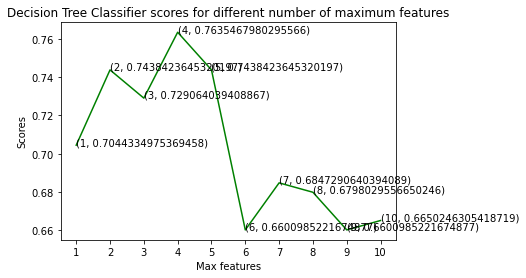

In [88]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [89]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[9]*100, [2,4,18]))

The score for Decision Tree Classifier is 66.50246305418719% with [2, 4, 18] maximum features.


The chances of getting a loan will be higher for:

Applicants having a credit history (we observed this in exploration.)
Applicants with higher applicant and co-applicant incomes
Applicants with higher education level
Properties in urban areas with high growth perspectives

In [90]:
# create the object of the model
#Logistic Regression:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(acc_log)

80.29
